In [2]:
# celula de inicialização.
%matplotlib inline                         
import numpy as np                  # modulo numerico , essencial para trabalho cientifico
import pylab as pl                  # módulo gráfico

## Programa de Newton

Neste notebook vamos ver um exemplo concreto do programa Newtoniano, resolvendo um problema para o qual não temos conhecimento sficiente para construir a solução exacta. Vamos considerar um corpo em queda livre num planeta sem atmosfera, por exemplo a Lua, mas que parte de uma distância da superfície que *não é pequena* em relação ao raio do planeta. O **programa Newtoniano** está ilustrado na Figura. 
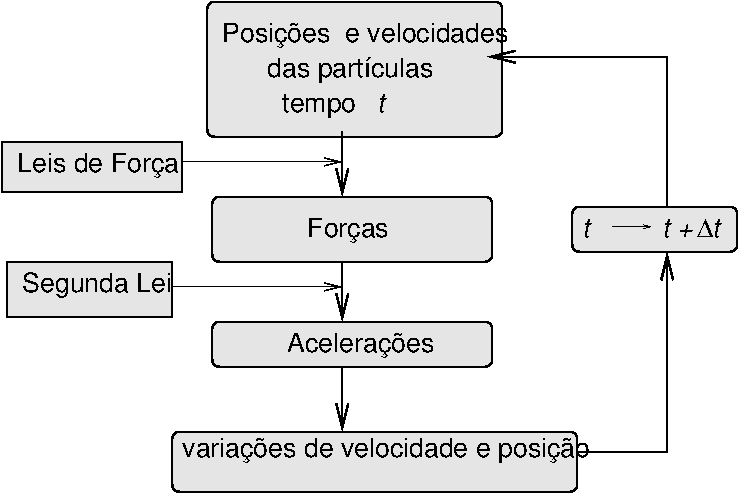

### Equação de movimento

Qual é a equação de movimento do nosso grave?

Suponhamos que o corpo parte do uma situação de velocidade nula a um distância $r_0$ do centro da Lua. Vai ter uma trajectória rectilínea na direção radial e $r(t)$ é a sua distância ao centro da Lua em função do tempo.
A força sobre ele é $$-G \frac{M_Lm}{r^2}, $$ o que significa uma aceleração 
$$ \frac{d^2 r}{dt^2}=-GM_L\frac{1}{r^2}.$$
De seguida vamos medir $r$ em unidades do raio da Lua
$$ r\to z:= r/R_L$$  
e $$R_L\frac{d^2 z}{dt^2}=-\frac{GM_L}{R_{L}^2}\frac{1}{z^2}$$ 
ou 
$$\frac{d^2 z}{dt^2}=-\frac{GM_L}{R_{L}^3}\frac{1}{z^2}$$ 
Uma vez que  $z=r/R$ é adimensional a equação de movimento mostra que ${GM_L}/{R_{L}^3}$ tem  dimensão $T^{-2}$. Assim este problema ficou reduzido a dois parâmetros:

 - a posição inicial,  $z_0$; 
 
 - uma escala de tempo $T_L:=\sqrt{R_{L}^3/GM_L}$. Para a Lua vale $T_L=10.4$ s. 

Uma mudança de variável, $t\to\tau:=t/T_L$, permite escrever a equação na forma mais simples 
$$\frac{d^2 z}{d\tau^2}=-\frac{1}{z^2}$$
com a condição inicial $z(0)=z_0$ e $v(0)=0$.

Como determinar $z(t)$ e $v(t)$?

### Método de Euler

Usando a fórmula de Euler, 
$$ z(\tau+\Delta \tau)=z(\tau)+v(\tau)\Delta \tau,$$
temos
$$ z(\Delta \tau)=z(0)+v(0)\Delta \tau= z(0),$$
Nesta aproximação, como a velocidade incial é nula, não há deslocamento. Mas
$$ v(\Delta \tau)=v(0)+a(0)\Delta \tau= 0-\frac{1}{z_{0}^2}\Delta \tau=-\frac{1}{z_{0}^2}\Delta \tau$$
Escrevamos estas expressões em Python, fixando valores de $z_0$ e $\Delta \tau$.

Como é claro que podemos usar o nome que quisermos para as variáveis daqui para frente referiremos o tempo como sendo $t$, mas lembrando-nos que a variável que estamos a usar é *o tempo em unidades de $T_L$* ($\tau$)

In [4]:
v0=0
z0=3
dt=.1
z1=z0+v0*dt
v1=v0-(1/z0**2)*dt
print(z1,v1)
print('%5.3f\t %5.3f' % (z1,v1))  # impressão formatada

3.0 -0.011111111111111112
3.000	 -0.011


Agora podemos simplesmente repetir copiando e editando:

In [5]:
# Começamos do princípio
v0=0
z0=3
dt=.1
z1=z0+v0*dt
v1=v0-(1/z0**2)*dt
print('%5.3f\t %5.3f' % (z1,v1))
# repetimos com os novos valores de z e v 
v0=v1                      # substituímos v0 pelos valor v(dt)
z0=z1                      # substituímos z0 pelo valor z(dt)
z1=z0+v0*dt
v1=v0-(1/z0**2)*dt
print('%5.3f\t %5.3f' % (z1,v1))

3.000	 -0.011
2.999	 -0.022


Para repetir um acção existem em todas as linguagens **ciclos**: As células seguintes ilustram um caso simples.  

In [5]:
x=np.arange(4)
print(x)

[0 1 2 3]


In [5]:
for i in range(4):
    print(i)
print('done')


0
1
2
3
done


O bloco indentado (que se segue aos ':') é o que é repetido. O último print() está fora desse bloco e só é executado uma vez depois de sair do ciclo.  Vejamos então como fazer um ciclo no caso da nossa equação de movimento.

In [6]:
v0=0
z0=3
dt=.1
for i in range (10):
    z1=z0+v0*dt
    v1=v0-(1/z0**2)*dt
    print('%5.3f\t %5.3f' % (z1,v1))
    z0=z1
    v0=v1
    # ciclo termina aqui
print()    
print('Agora já calculámos até t=9*dt!')


3.000	 -0.011
2.999	 -0.022
2.997	 -0.033
2.993	 -0.044
2.989	 -0.056
2.983	 -0.067
2.977	 -0.078
2.969	 -0.089
2.960	 -0.101
2.950	 -0.112

Agora já calculámos até t=9*dt!


Para melhor entendermos os resultado vamos imprimir uma terceira coluna com a aceleração: 

In [1]:
v0=0
z0=3
a0=-1/z0**2
print('z\tv\ta')
print('%5.3f\t %5.3f\t %5.3f' % (z0,v0, a0))
dt=.1
for i in range (10):
    z1=z0+v0*dt
    v1=v0+a0*dt
    a1= -1/z1**2
    print('%5.3f\t %5.3f\t %5.3f' % (z1,v1, a1))
    z0=z1
    v0=v1
    a0=a1
    # ciclo termina aqui
print()    
print('Done')

z	v	a
3.000	 0.000	 -0.111
3.000	 -0.011	 -0.111
2.999	 -0.022	 -0.111
2.997	 -0.033	 -0.111
2.993	 -0.044	 -0.112
2.989	 -0.056	 -0.112
2.983	 -0.067	 -0.112
2.977	 -0.078	 -0.113
2.969	 -0.089	 -0.113
2.960	 -0.101	 -0.114
2.950	 -0.112	 -0.115

Done


Podemos começar a ver que a aceleração *não é constante!* 

para prosseguir vamos fazer as seguintes alterações. 

 - guardar os valores de posição, velocidade e aceleração num vector;
 
 - definir uma varíavel como sendo o número de intervalos $\Delta t$; 
 
 - representar graficamente os resultados.

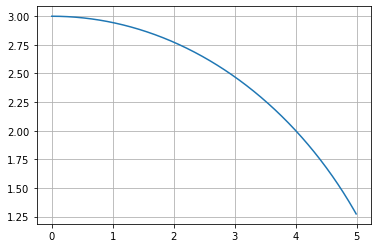

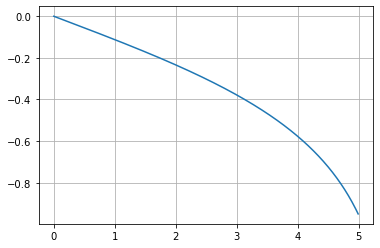

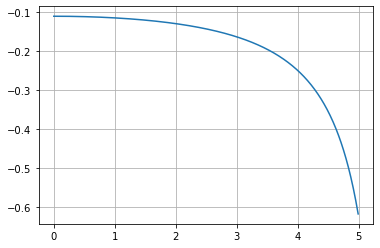

In [12]:
N=500
dt=.01
zs= np.zeros(N, float)
vels=np.zeros(N, float)
acs=np.zeros(N, float)
zs[0]=3
vels[0]=0.
acs[0]=-1/zs[0]**2
for i in range (N-1): 
    zs[i+1]=zs[i]+vels[i]*dt
    vels[i+1]=vels[i]+acs[i]*dt
    acs[i+1]= -1/zs[i+1]**2
    # ciclo termina aqui
tempos = np.arange(N)*dt
#
# Figura 1
#
pl.figure(1)
pl.plot(tempos, zs)
pl.grid(True)
#
# Figura 2
#
pl.figure(2)
pl.plot(tempos,vels)
pl.grid(True)
#
# Figura 3
#
pl.figure(3)
pl.plot(tempos, acs)
pl.grid(True)

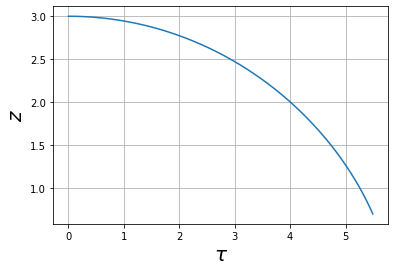

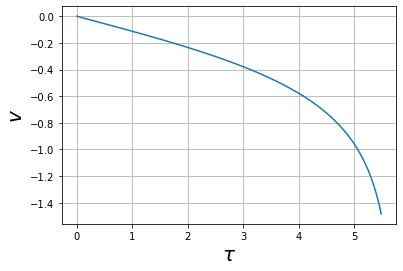

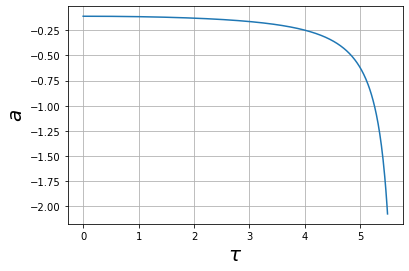

In [5]:
# mais alguns passos para ver se chegamos à superfície da Lua z=1

N=550
dt=.01
zs= np.zeros(N, float)
vels=np.zeros(N, float)
acs=np.zeros(N, float)
zs[0]=3
vels[0]=0.
acs[0]=-1/zs[0]**2
for i in range (N-1): 
    zs[i+1]=zs[i]+vels[i]*dt
    vels[i+1]=vels[i]+acs[i]*dt
    acs[i+1]= -1/zs[i+1]**2
    # ciclo termina aqui
tempos = np.arange(N)*dt  
#
# Figura 1
#
pl.figure(1)
pl.xlabel (r'$\tau$', FontSize=20)
pl.ylabel (r'$z$', FontSize=20)
pl.grid(True)
pl.plot(tempos, zs)
#
# Figura 2
#
pl.figure(2)
pl.xlabel (r'$\tau$', FontSize=20)
pl.ylabel (r'$v$', FontSize=20)
pl.plot(tempos,vels)
pl.grid(True)
#
# Figura 3
#
pl.figure(3)
pl.xlabel (r'$\tau$', FontSize=20)
pl.ylabel (r'$a$', FontSize=20)
pl.plot(tempos, acs)
pl.grid(True)

Para finalizar, vejamos como seria o movimento se a aceleração não variasse. Teríamos 
$$ v(t)=v_0-a_0t$$
e
$$ z(t)=z_0-\frac{1}{2}a_0 t^2$$


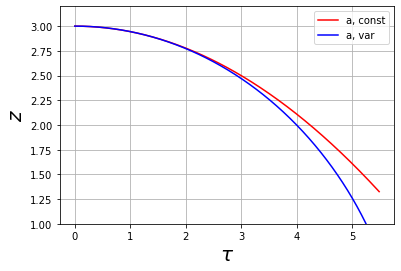

In [7]:
z0=3
a0 =-1/z0**2
v0=0
tempos = np.arange(N)*dt  
zs_a_const= np.zeros(N, float)
zs_a_const=z0+0.5*a0*tempos**2
pl.figure(1)
pl.xlabel (r'$\tau$', FontSize=20)
pl.ylabel (r'$z$', FontSize=20)
pl.ylim([1,3.2])
pl.plot(tempos, zs_a_const, 'r-',tempos, zs,'b-')
pl.legend(['a, const','a, var']);
pl.grid(True)



Fizemos o gráfico até $z=1$ que é o valor correspondente à superfície do Planeta. Podemos ler o tempo de queda no eixo horizontal. 